In [448]:
import opendatasets as od
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [449]:
od.download('https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles','somke.csv')

Skipping, found downloaded files in "somke.csv\co2-emission-by-vehicles" (use force=True to force download)


In [450]:
import pandas as pd

In [451]:
smoke_df=pd.read_csv('somke.csv/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')

In [452]:
smoke_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [453]:
smoke_df.rename(columns={'Make':'make','Model':'model','Engine Size(L)':'engine_size','Cylinders':'cylinders','Transmission':'transmission','Fuel Consumption City (L/100 km)':'fuel_consumption_city','Fuel Consumption Hwy (L/100 km)':'fuel_consumption_hwy','Fuel Consumption Comb (L/100 km)':'fuel_consumption_comb_l','Fuel Type':'fuel_type','Vehicle Class':'vehicle_class','Fuel Consumption Comb (mpg)':'fuel_consumption_mpg','CO2 Emissions(g/km)':'co2_emissions'},inplace=True)
smoke_df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_l,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Text(0, 0.5, 'emissions')

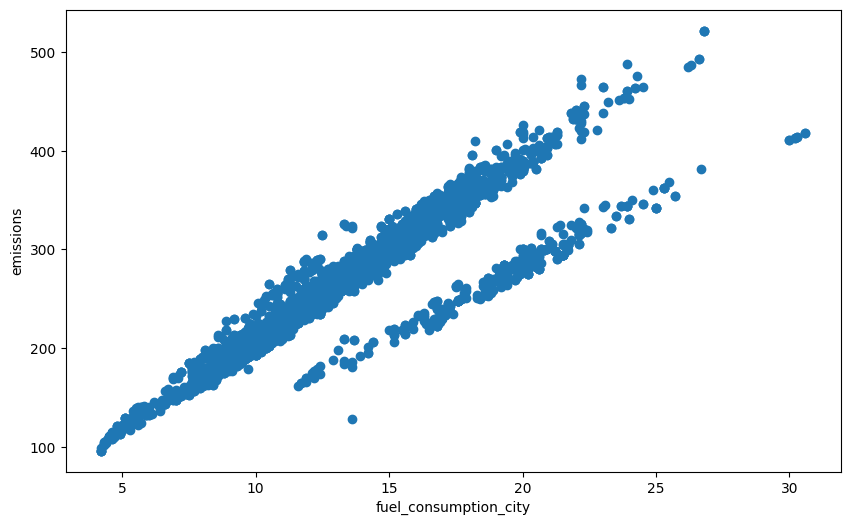

In [455]:
plt.figure(figsize=(10,6))
plt.scatter(smoke_df.fuel_consumption_city,smoke_df.co2_emissions)
plt.xlabel('fuel_consumption_city')
plt.ylabel('emissions')

Text(0, 0.5, 'emissions')

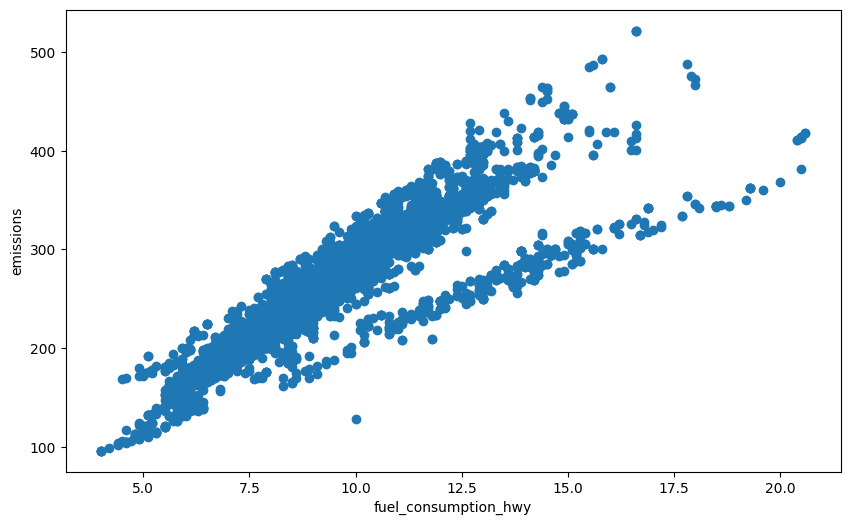

In [463]:
plt.figure(figsize=(10,6))
plt.scatter(smoke_df.fuel_consumption_hwy,smoke_df.co2_emissions)
plt.xlabel('fuel_consumption_hwy')
plt.ylabel('emissions')

Text(0, 0.5, 'emissions')

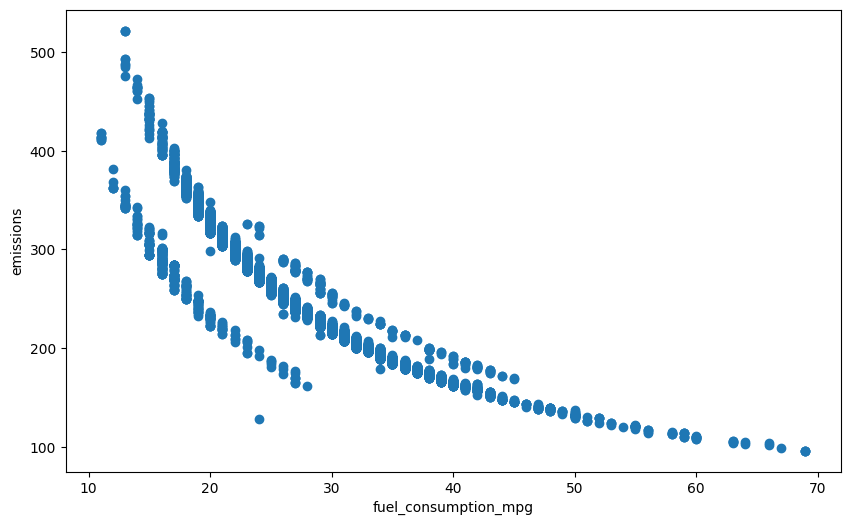

In [464]:
plt.figure(figsize=(10,6))
plt.scatter(smoke_df.fuel_consumption_mpg,smoke_df.co2_emissions)
plt.xlabel('fuel_consumption_mpg')
plt.ylabel('emissions')

Text(0, 0.5, 'emissions')

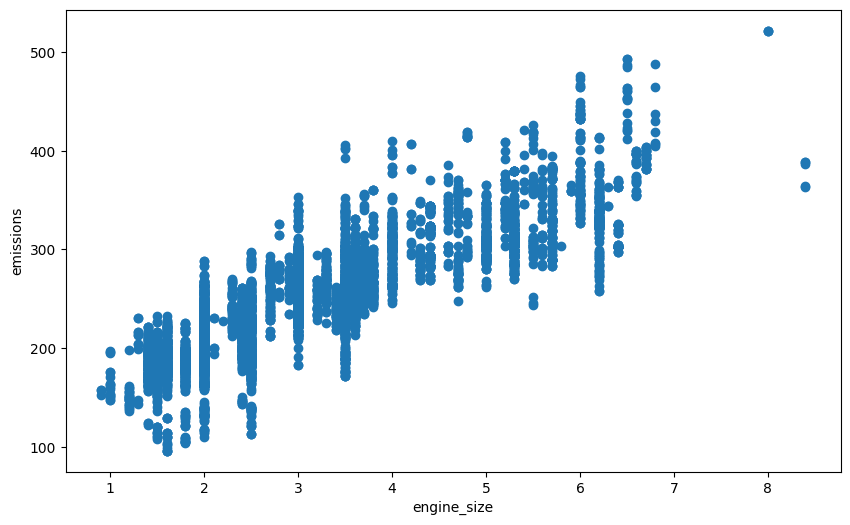

In [457]:
plt.figure(figsize=(10,6))
plt.scatter(smoke_df.engine_size,smoke_df.co2_emissions)
plt.xlabel('engine_size')
plt.ylabel('emissions')

Text(0, 0.5, 'emissions')

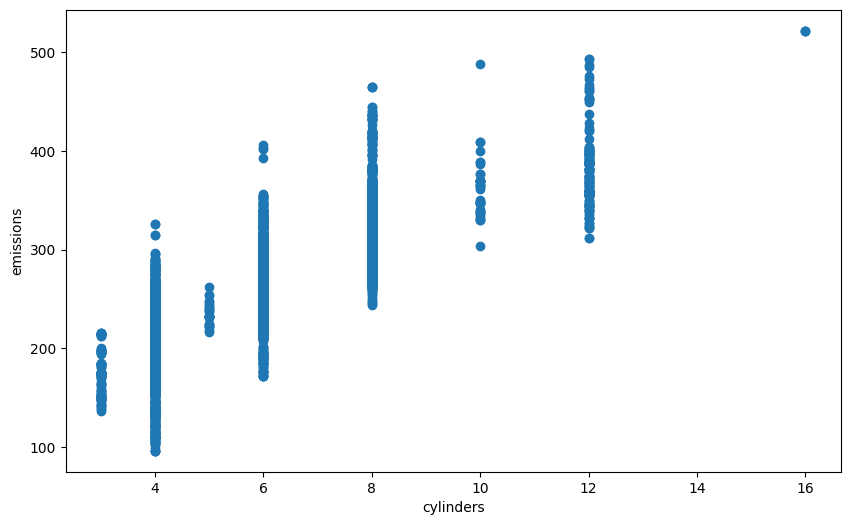

In [459]:
plt.figure(figsize=(10,6))
plt.scatter(smoke_df.cylinders,smoke_df.co2_emissions)
plt.xlabel('cylinders')
plt.ylabel('emissions')

By observing the above graphs we can conclude that cylinders wont help for linear regression but fuel consumption in highway and city contributes more to a linear model and engine size also contributes to some extent.


In the further implemention of linear regression model the weights assigned to parameters like transmission and fuel_consumption_comb_l were zero,hence I have removed those columns.

fuel_consumption_mpg had negative impacts but that does not affect the model like contributing significant amount to R2score or rmse value,hence I neglected it and removed.

In [465]:
smoke_df.drop(['fuel_consumption_mpg'],axis='columns',inplace=True)
smoke_df.drop(['cylinders'],axis='columns',inplace=True)
smoke_df.drop(['model'],axis='columns',inplace=True)
smoke_df.drop(['transmission'],axis='columns',inplace=True)
smoke_df.drop(['fuel_consumption_comb_l'],axis='columns',inplace=True)


In [466]:
train_df,test_df=train_test_split(smoke_df,test_size=0.30,train_size=0.70,random_state=42)

In [467]:
input_cols=smoke_df.columns.tolist()[0:-1]


In [468]:
target_col='co2_emissions'

In [469]:
train_inputs=train_df[input_cols]
train_target=train_df[target_col]

In [470]:
test_inputs=test_df[input_cols]
test_target=test_df[target_col]

In [471]:
numeric_cols=smoke_df.select_dtypes('number').columns.tolist()[0:-1]
object_cols=smoke_df.select_dtypes('object').columns.tolist()

In [472]:
encoder=OneHotEncoder(sparse_output=False)

In [473]:
encoder.fit(smoke_df[object_cols])

OneHotEncoder(sparse_output=False)

In [474]:
encoded_cols=encoder.get_feature_names_out(object_cols).tolist()

In [475]:
train_inputs.loc[:,encoded_cols]=encoder.transform(train_inputs[object_cols])
test_inputs.loc[:,encoded_cols]=encoder.transform(test_inputs[object_cols])

In [476]:
from sklearn.preprocessing import MinMaxScaler

In [477]:
scaler=MinMaxScaler()

In [478]:
scaler.fit(smoke_df[numeric_cols])

MinMaxScaler()

In [479]:
train_inputs.loc[:,numeric_cols]=scaler.transform(train_inputs[numeric_cols])

In [480]:
test_inputs.loc[:,numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [481]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [482]:
def rmse(actual,prediction):
    return np.sqrt(np.mean(np.square(prediction-actual)))
   

In [484]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,train_target)

LinearRegression()

In [485]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(random_state=42)
lasso_model.fit(X_train,train_target)

Lasso(random_state=42)

In [486]:
model.score(X_train,train_target)

0.9928865338406917

In [487]:
lasso_model.score(X_test,test_target)

0.9314194477281708

In [489]:
predict_1=lasso_model.predict(X_train)
predict_2=lasso_model.predict(X_test)

In [490]:
rmse(test_target,predict_2)

15.219885386360769

In [413]:
rmse(train_target,predict_1)

15.078265796918195

In [491]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with cross-validation
lasso_cv = LassoCV(cv=3, random_state=42)

# Fit the model to the training data
lasso_cv.fit(X_train, train_target)


LassoCV(cv=3, random_state=42)

In [415]:
coefficients = lasso_model.coef_

In [416]:
weights_df=pd.DataFrame({'feature':X_train.columns.tolist(),'weights':coefficients.tolist()})

In [417]:
weights_df

,feature,weights
0,engine_size,69.924190
1,fuel_consumption_city,210.879563
2,fuel_consumption_hwy,95.797162
3,make_ACURA,-0.000000
4,make_ALFA ROMEO,-0.000000
...,...,...
61,fuel_type_D,0.000000
62,fuel_type_E,-47.472100
63,fuel_type_N,0.000000
64,fuel_type_X,-0.000000


In [418]:
def predict(make, vehicle_class, engine_size, fuel_type, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_mpg):
    
    data = {
        'make': [make],
        'vehicle_class': [vehicle_class],
        'engine_size': [engine_size],
        'fuel_type': [fuel_type],
        'fuel_consumption_city': [fuel_consumption_city],
        'fuel_consumption_hwy': [fuel_consumption_hwy],
        'cylinders': [cylinders]
    }  
    df = pd.DataFrame(data)
    df[numeric_cols] = scaler.transform(df[numeric_cols])  
    df[encoded_cols]=encoder.transform(df[object_cols])
    X_t=df[numeric_cols+encoded_cols]
    prediction = lasso_model.predict(X_t)
    return prediction


In [419]:
from sklearn.model_selection import cross_val_score

In [428]:
cross_val_score(lasso_cv,X_train,train_target,cv=kf)

array([0.99172246, 0.9927315 , 0.99244685])

In [429]:
cross_val_score(lasso_cv,X_test,test_target,cv=3)

array([0.99067218, 0.98926071, 0.99119978])

In [430]:
train_df.columns

Index(['make', 'vehicle_class', 'engine_size', 'fuel_type',
       'fuel_consumption_city', 'fuel_consumption_hwy', 'co2_emissions'],
      dtype='object')

In [432]:
lasso_cv.alpha_

0.009076355356612708

In [433]:
lasso_cv.score(X_train,train_target)

0.992762242167028

In [434]:
lasso_cv.score(X_test,test_target)

0.9909684861678284

In [436]:
coefficients=lasso_cv.coef_

In [437]:
weights_df=pd.DataFrame({'feature':X_train.columns.tolist(),'weights':coefficients.tolist()})
weights_df.head(10)



,feature,weights
0,engine_size,6.246094
1,fuel_consumption_city,332.980924
2,fuel_consumption_hwy,158.020584
3,make_ACURA,-0.375043
4,make_ALFA ROMEO,0.000000
5,make_ASTON MARTIN,0.603130
6,make_AUDI,-0.254915
7,make_BENTLEY,0.614151
8,make_BMW,-0.282257
9,make_BUGATTI,0.000000


I have got maximum score and minimum rmse value in lassoCV model hence, I have deployed that model.